<a href="https://colab.research.google.com/github/gatonymous/RSA-Decryption-With-Short/blob/main/Shor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# DESENCRIPTACIÓN DEL AGORITMO RSA - ALGORITMO DE SHOR
## Computación Cuántica

---
## Autors:
* Montañez C. Willians
* Reynaga F. A. Vanessa
* Espinosa C. N. Alaniz
* Huaicochea C. Wilber E.
* Cornejo C. J. Wilson


---



# Indice
* [1. Librerias](#1-Librerias)
* [2. Análisis de Complejidad Big-O](#2-Análisis-de-Complejidad-Big-O)
* [3. Shor Clásico](#3-Shor-Clásico)
    * [3.1. Periodo](#31-Periodo)
    * [3.2. Búsqueda del periodo](#32-Búsqueda-del-periodo)
    * [3.3. Algoritmo clásico de Shor](#Algoritmo-clásico-de-Shor)
* [4. Transformada Cuántica de Fourier - QTF](#4-Transformada-Cuántica-de-Fourier---QTF)
* [5. Algoritmo Cuático de Shor](#5-Algoritmo-Cuático-de-Shor)
    * [5.1. Shor para N = 15](#51-Shor-para-N--15)
    * [5.2 Genera N a partir de p y q](#52-Genera-N-a-partir-de-p-y-q)
    * [5.3. Shor para N](#53-Shor-para-N)
        * [5.3.1. Cirucuito - Shor](#531-Cirucuito---Shor)
        * [5.3.2. Algoritmmo cuántico de Shor](#532-Algoritmmo-cuántico-de-Shor)

---

# 1. Librerias

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=476a51e85e342bc0031198a995735d003206a5026c48e58beda72e8660ae9d05
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 2. Análisis de Complejidad Big-O

<ipython-input-4-9b1810e516cf>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  O_fact_n = np.array([np.math.factorial(int(x)) for x in n])


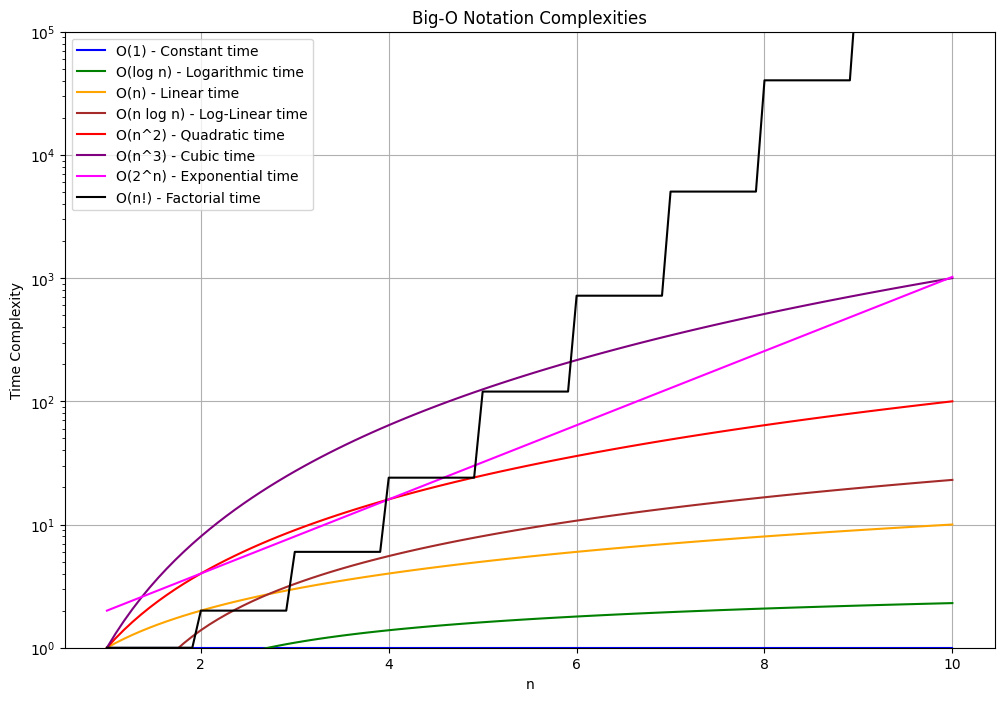

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir el rango para n
n = np.linspace(1, 10, 100)

# Definir las funciones para cada complejidad.
O_1 = np.ones_like(n)
O_log_n = np.log(n)
O_n = n
O_n_log_n = n * np.log(n)
O_n2 = n ** 2
O_n3 = n ** 3
O_2n = 2 ** n
O_fact_n = np.array([np.math.factorial(int(x)) for x in n])

# Trazar cada complejidad
plt.figure(figsize=(12, 8))
plt.plot(n, O_1, label='O(1) - Constant time', color='blue')
plt.plot(n, O_log_n, label='O(log n) - Logarithmic time', color='green')
plt.plot(n, O_n, label='O(n) - Linear time', color='orange')
plt.plot(n, O_n_log_n, label='O(n log n) - Log-Linear time', color='brown')
plt.plot(n, O_n2, label='O(n^2) - Quadratic time', color='red')
plt.plot(n, O_n3, label='O(n^3) - Cubic time', color='purple')
plt.plot(n, O_2n, label='O(2^n) - Exponential time', color='magenta')
plt.plot(n, O_fact_n, label='O(n!) - Factorial time', color='black')

# Personaliza la trama
plt.ylim(1, 1e5)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Time Complexity')
plt.title('Big-O Notation Complexities')
plt.legend()
plt.grid(True)
plt.show()


# 3. Shor Clásico

## 3.1. Periodo

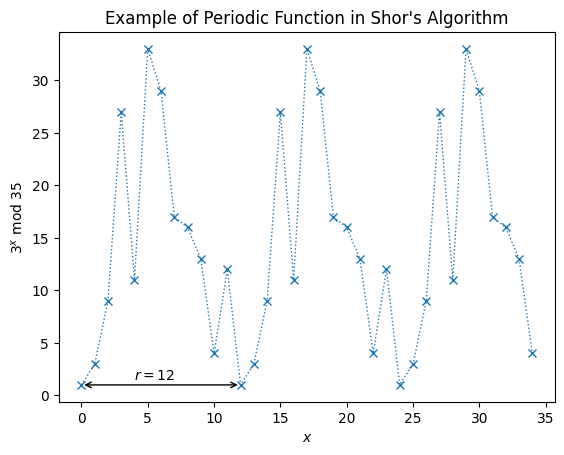

In [ ]:
N = 35
a = 3

# Calcular los datos del gráfico
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Utilice matplotlib para mostrarlo de forma ordenada
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # Traza r en el gráfico
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

## 3.2. Búsqueda del periodo

In [ ]:
# Algoritmo de búsqueda de períodos por fuerza bruta
import math
import random, itertools
def find_period_classical(x, N):
    n = 1
    t = x
    while t != 1:
        t *= x
        t %= N
        n += 1
    return n

## 3.3. Algoritmo clásico de Shor

In [ ]:
def shors_algorithm_classical(N):
    x = random.randint(0,N) # paso uno
    if(math.gcd(x,N) != 1): # paso dos
        return x,0,math.gcd(x,N),N/math.gcd(x,N)
    r = find_period_classical(x,N) # paso tres
    while(r % 2 != 0):
        r = find_period_classical(x,N)
    p = math.gcd(x**int(r/2)+1,N) # Paso cuatro, ignorando el caso donde (x^(r/2) +/- 1) es un múltiplo de N
    q = math.gcd(x**int(r/2)-1,N)
    return x,r,p,q

In [ ]:
N = 15
# N = int(input())
x,r,p,q = shors_algorithm_classical(N)
print("semiprime N = ",N,", coprime x = ",x,", period r = ",r,", prime factors = ",p," and ",q,sep="")

semiprime N = 15, coprime x = 8, period r = 4, prime factors = 5 and 3


# 4. Transformada Cuántica de Fourier - QTF

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi

In [ ]:
def QFT(n):
    # n := número de qubits

    qft_circ = QuantumCircuit(n,n)

    for i in range(n-1, -1, -1): # luego i va de n-1 a 0, restando de uno en uno

        qft_circ.h(i) # primero añadimos la puerta H

        for j in range(i - 1, -1, -1):
            # por definir así la j, hacemos el CU1 con todos los qubits que quedan por encima

            #primero pasamos el parámetro luego el qubit de control y luego el objetivo
            qft_circ.cp(pi/(2 ** (i - j)), j, i)

        qft_circ.barrier(range(n))

    for i in range(n // 2): # hacemos el swap final para que queden bien cuadrados
        qft_circ.swap(i, n - i - 1)

    return qft_circ

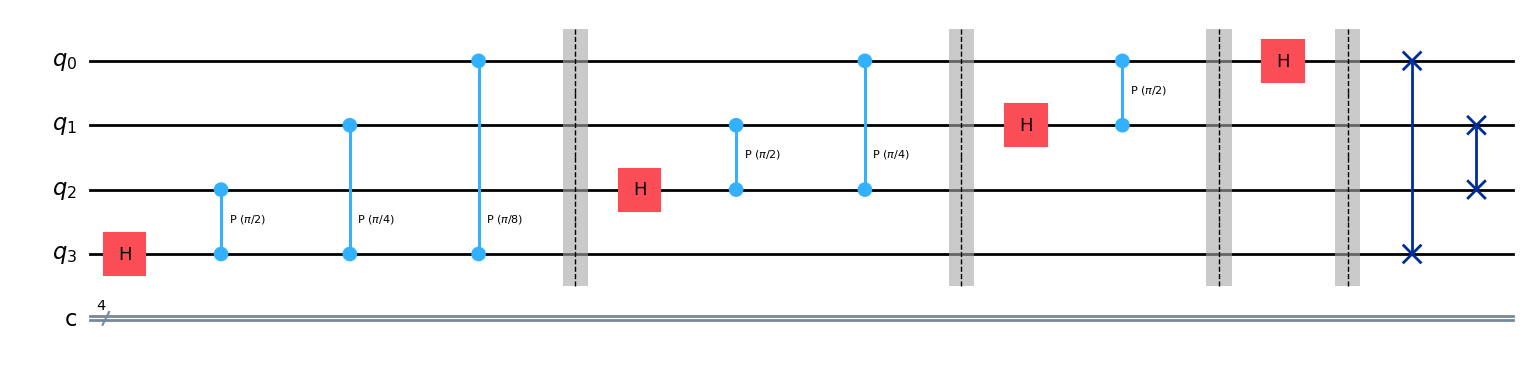

In [ ]:
n = 4
QFT(n).draw('mpl')

# 5. Algoritmo Cuático de Shor

## 5.1. Shor para N = 15

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi

In [ ]:
def _7mod15():

    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

In [ ]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)

        for j in range(i - 1, -1, -1):
            qft_circ.cp(pi/(2 ** (i - j)), j, i)


    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

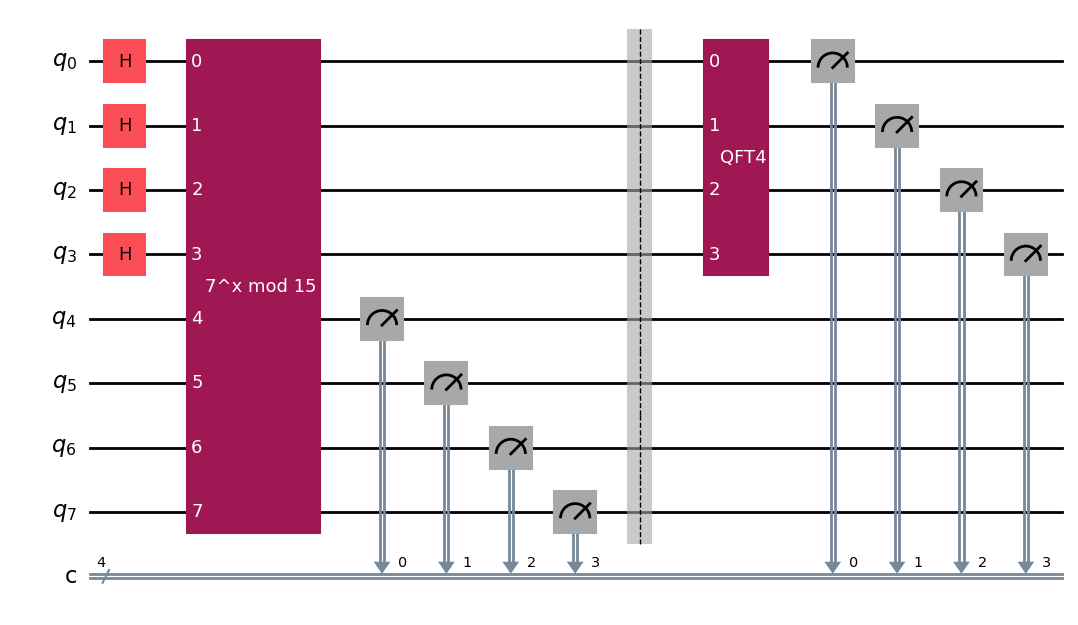

In [ ]:
circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw(output = 'mpl')

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import pi

<ipython-input-16-5dd5c3412403>:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


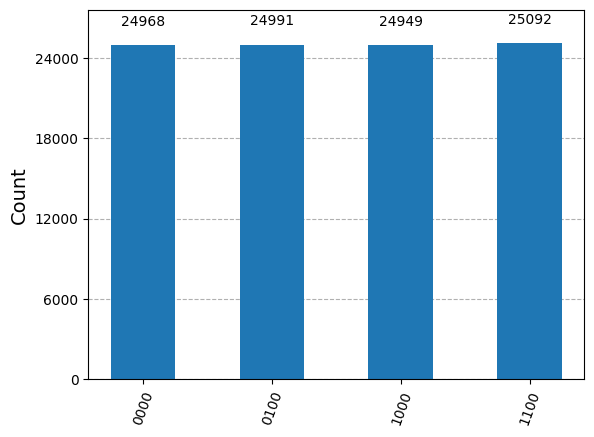

In [ ]:
# Simulación
simulator = AerSimulator()
transpiled_circ = transpile(circ, simulator)
qobj = assemble(transpiled_circ, shots=100000)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Mostrar el histograma
plot_histogram(counts)

In [ ]:
# con esto sabemos que 4 es raiz cuadrada ya que el mcd de 4 8 12 es 4
# sabiendo esto podemos calcular los factores primos de la siguiente manera:

import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)

factores primos: 3 5


## 5.2 Genera N a partir de p y q

In [ ]:
import sympy

n = 14 # número de bits
# Definimos el rango
min_50_bits = 2**(n-1)
max_50_bits = 2**n - 1

# Encontramos un primo cercano a la raíz cuadrada del rango mínimo
p = sympy.prevprime(int(min_50_bits**0.5))

# Encontramos un segundo primo tal que el producto esté dentro del rango
while True:
    q = sympy.nextprime(p)
    producto = p * q
    if min_50_bits <= producto <= max_50_bits:
        break
    p = sympy.prevprime(p)

(p, q, producto)


(89, 97, 8633)

## 5.3. Shor para N

In [ ]:
import numpy as np
from math import gcd
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT

In [ ]:
# Función auxiliar para encontrar factores utilizando el GCD
def get_factors(N, a, r):
    if r % 2 != 0:
        return None
    factor1 = gcd(a**(r//2) - 1, N)
    factor2 = gcd(a**(r//2) + 1, N)
    if factor1 == 1 or factor2 == 1 or factor1 == N or factor2 == N:
        return None
    return factor1, factor2

# Función para construir el circuito de la transformada cuántica de Fourier inversa
def inverse_qft(qc, n):
    qft_circ = QFT(num_qubits=n, do_swaps=False).inverse()
    qc.append(qft_circ.to_instruction(), qc.qubits[:n])

### 5.3.1. Cirucuito - Shor

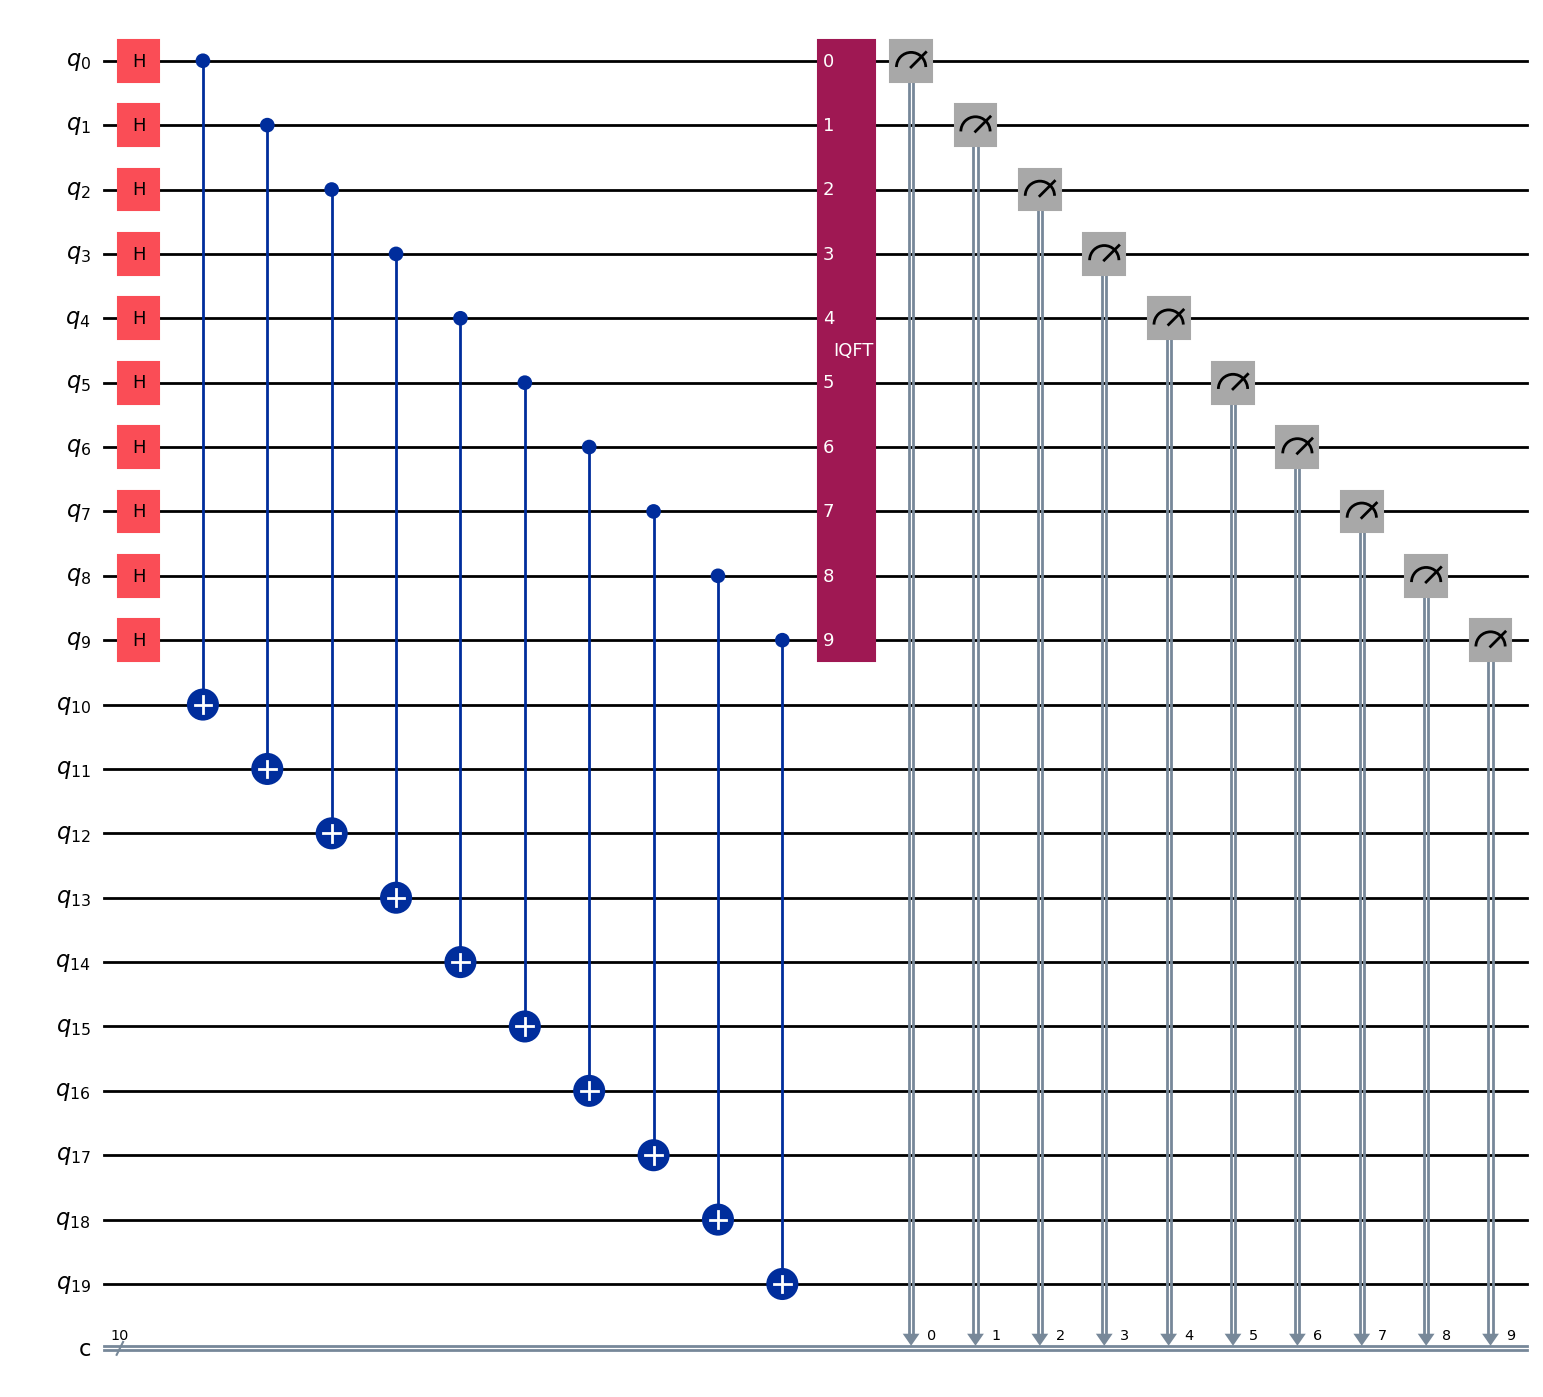

In [ ]:
N = 851
# N = 3811
# N = 836750619224483
# N = 268828591
# N = 8633
# Crear un circuito cuántico
n = int(np.ceil(np.log2(N)))
qc = QuantumCircuit(2*n, n)

# Inicializar los registros en una superposición uniforme
qc.h(range(n))

# Aplicar el operador U_f
for i in range(n):
    qc.cx(i, n + i)

# Aplicar la QFT inversa
inverse_qft(qc, n)

# Medir
qc.measure(range(n), range(n))

# Dibujar el circuito
#print(qc.draw(output='text'))
qc.draw('mpl')

### 5.3.2. Algoritmmo cuántico de Shor

In [ ]:
# Algoritmo de Shor
def shor_algorithm(N):
    # Elegir un número aleatorio a
    a = np.random.randint(2, N)
    print(f"Usando a = {a}")

    # Calcular el GCD de a y N
    if gcd(a, N) != 1:
        return gcd(a, N)

    # Crear un circuito cuántico
    n = int(np.ceil(np.log2(N)))
    qc = QuantumCircuit(2*n, n)

    # Inicializar los registros en una superposición uniforme
    qc.h(range(n))

    # Aplicar el operador U_f
    for i in range(n):
        qc.cx(i, n + i)

    # Aplicar la QFT inversa
    inverse_qft(qc, n)

    # Medir
    qc.measure(range(n), range(n))

    # Dibujar el circuito
    #print(qc.draw(output='text'))
    #qc.draw('mpl')
    #circuit_drawer(qc, output='mpl', filename='shor_circuit.png')
    #plt.show()


    # Transpilar el circuito para el simulador
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)

    # Ejecutar el circuito en el simulador
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    # Encontrar el período r
    measured = max(counts, key=counts.get)
    r = int(measured, 2)
    print(f"Período r = {r}")

    # Encontrar los factores
    factors = get_factors(N, a, r)
    if factors:
        return factors
    return None

In [ ]:
# Ejemplo de uso
# N = 3811
N = 851
# N = 836750619224483
# N = 268828591
# N = 8633
factors = shor_algorithm(N)
if factors:
    print(f"Factores de {N}: {factors}")
else:
    print(f"No se encontraron factores para {N}")

Usando a = 23
Factores de 851: 23


In [ ]:
def BuscarShor(N, i):
    factors = shor_algorithm(N)
    intento = 0
    while factors is None and intento <= i:
        factors = shor_algorithm(N)
        print(f"Factores de {N}: {factors}", '->',intento, 'intentos')
        intento += 1

In [ ]:
# buscar para N con i - intentos
BuscarShor(3811, 10)

Usando a = 77
Período r = 238
Usando a = 3799
Período r = 3841
Factores de 3811: None -> 0 intentos
Usando a = 3302
Período r = 1875
Factores de 3811: None -> 1 intentos
Usando a = 1347
Período r = 2484
Factores de 3811: None -> 2 intentos
Usando a = 2883
Período r = 2437
Factores de 3811: None -> 3 intentos
Usando a = 1561
Período r = 618
Factores de 3811: None -> 4 intentos
Usando a = 244
Período r = 1866
Factores de 3811: None -> 5 intentos
Usando a = 3032
Período r = 3938
Factores de 3811: None -> 6 intentos
Usando a = 2816
Período r = 2524
Factores de 3811: None -> 7 intentos
Usando a = 2800
Período r = 2221
Factores de 3811: None -> 8 intentos
Usando a = 1654
Período r = 477
Factores de 3811: None -> 9 intentos
Usando a = 768
Período r = 3089
Factores de 3811: None -> 10 intentos


### 5.3.3. Comparación: clásica vs cuántica

In [ ]:
import time

N = 851
# Medir el tiempo de ejecución del algoritmo cuántico
inicio = time.time()

factors = shor_algorithm(N)
if factors:
    print(f"Factores de {N}: {factors}")
else:
    print(f"No se encontraron factores para {N}")
print('____________________________________________________________________________________________')

fin = time.time()
tiempo_cuantico = fin - inicio

# Medir el tiempo de ejecución del algoritmo clásico
inicio = time.time()

x,r,p,q = shors_algorithm_classical(N)
print("semiprime N = ",N,", coprime x = ",x,", period r = ",r,", prime factors = ",p," and ",q,sep="")

print('____________________________________________________________________________________________')

fin = time.time()
tiempo_clasico = fin - inicio

print('_____________________________________________________')
print('Algoritmo clásico:', tiempo_clasico, 'segundos')
print('Algoritmo cuántico:', tiempo_cuantico, 'segundos')

Usando a = 301
Período r = 334
No se encontraron factores para 851
____________________________________________________________________________________________
semiprime N = 851, coprime x = 134, period r = 132, prime factors = 37 and 23
____________________________________________________________________________________________
_____________________________________________________
Algoritmo clásico: 0.0018362998962402344 segundos
Algoritmo cuántico: 0.2870793342590332 segundos
